# 1. Input: 

In [5]:
import numpy as np
import matplotlib.pyplot as plt
def generate_all_possible_stripes(size):
    """
    Generates all possible matrices where one row or one column is entirely 1s.
    
    Parameters:
    - size: Tuple indicating the size of the matrix (height, width).
    
    Returns:
    - stripe_matrices: A list of numpy arrays representing all possible striped matrices.
    """
    stripe_matrices = []

    # Generate matrices with one row filled with 1s
    for i in range(size[0]):
        matrix = np.zeros(size)
        matrix[i, :] = 1
        stripe_matrices.append(matrix)

    # Generate matrices with one column filled with 1s
    for j in range(size[1]):
        matrix = np.zeros(size)
        matrix[:, j] = 1
        stripe_matrices.append(matrix)

    return stripe_matrices

# Example usage
all_stripes = generate_all_possible_stripes((4, 4))

# Display the generated matrices
for i, stripe in enumerate(all_stripes):
    print(f"Stripe {i+1}:\n{stripe}\n")


Stripe 1:
[[1. 1. 1. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Stripe 2:
[[0. 0. 0. 0.]
 [1. 1. 1. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Stripe 3:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 1. 1. 1.]
 [0. 0. 0. 0.]]

Stripe 4:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 1. 1. 1.]]

Stripe 5:
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]

Stripe 6:
[[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]

Stripe 7:
[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]

Stripe 8:
[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]



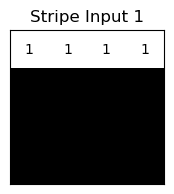

Final Output for Stripe 1: 0.6909831980218556



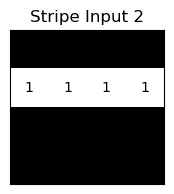

Final Output for Stripe 2: 2.3844908729034175



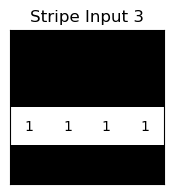

Final Output for Stripe 3: 5.442292083728651



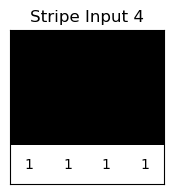

Final Output for Stripe 4: 1.5614635760098983



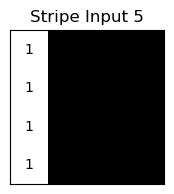

Final Output for Stripe 5: 1.1329384499091941



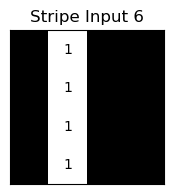

Final Output for Stripe 6: 6.1566072053202



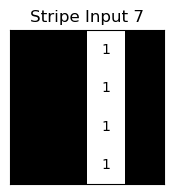

Final Output for Stripe 7: 6.625455686744012



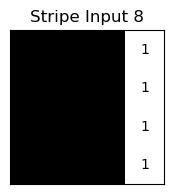

Final Output for Stripe 8: 3.633464977860246



In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Convolution function (slightly adjusted for multiple layers)
def convolve(input_image, filters):
    output_size = input_image.shape[0] - 1
    output = np.zeros((output_size, output_size))
    for i in range(output_size):
        for j in range(output_size):
            region = input_image[i:i+2, j:j+2]
            output[i, j] = np.sum(region * filters[i, j])
    return output

# Function to generate all possible stripe inputs
def generate_all_possible_stripes(size):
    stripe_matrices = []
    for i in range(size[0]):
        matrix = np.zeros(size)
        matrix[i, :] = 1
        stripe_matrices.append(matrix)
    for j in range(size[1]):
        matrix = np.zeros(size)
        matrix[:, j] = 1
        stripe_matrices.append(matrix)
    return stripe_matrices

# Function to update weights based on activation history
def update_weights(filters, activation_history, learning_rate):
    new_filters = np.copy(filters)
    for i in range(filters.shape[0]):
        for j in range(filters.shape[1]):
            recent_activations = activation_history[i, j, -5:]
            avg_activation = np.mean(recent_activations)
            max_activation = np.max(recent_activations)
            if max_activation > high_intensity_threshold:
                new_filters[i, j] += learning_rate * filters[i, j]
            elif avg_activation < low_intensity_threshold:
                new_filters[i, j] -= learning_rate * filters[i, j]
    return new_filters

# Generate all possible stripe inputs
stripe_inputs = generate_all_possible_stripes((4, 4))

# Initialize filters and activation history for three layers
filters_1 = np.random.rand(3, 3, 2, 2)
filters_2 = np.random.rand(2, 2, 2, 2)
filters_3 = np.random.rand(1, 1, 2, 2)

activation_history_1 = np.zeros((3, 3, 10))
activation_history_2 = np.zeros((2, 2, 10))
activation_history_3 = np.zeros((1, 1, 10))

# Parameters for weight update rule
high_intensity_threshold = 0.8
low_intensity_threshold = 0.2
learning_rate = 0.01
time_steps = 10

# Function to display the input as a grid of numbers
def display_input(input_image, title):
    plt.figure(figsize=(2, 2))
    plt.imshow(input_image, cmap='gray', vmin=0, vmax=1)
    for i in range(input_image.shape[0]):
        for j in range(input_image.shape[1]):
            plt.text(j, i, int(input_image[i, j]), ha='center', va='center', color='black')
    plt.title(title)
    plt.xticks([])
    plt.yticks([])
    plt.show()

# Process each stripe input through the CNN
for index, input_image in enumerate(stripe_inputs):
    display_input(input_image, f"Stripe Input {index+1}")
    
    for t in range(time_steps):
        # Stage 1 Convolution (4x4 -> 3x3)
        output_1 = convolve(input_image, filters_1)
        activation_history_1 = np.roll(activation_history_1, -1, axis=2)
        activation_history_1[:, :, -1] = output_1
        filters_1 = update_weights(filters_1, activation_history_1, learning_rate)
        
        # Stage 2 Convolution (3x3 -> 2x2)
        output_2 = convolve(output_1, filters_2)
        activation_history_2 = np.roll(activation_history_2, -1, axis=2)
        activation_history_2[:, :, -1] = output_2
        filters_2 = update_weights(filters_2, activation_history_2, learning_rate)
        
        # Stage 3 Convolution (2x2 -> 1x1)
        output_3 = convolve(output_2, filters_3)
        activation_history_3 = np.roll(activation_history_3, -1, axis=2)
        activation_history_3[:, :, -1] = output_3
        filters_3 = update_weights(filters_3, activation_history_3, learning_rate)
    
    # Print the final single pixel output
    print(f"Final Output for Stripe {index+1}: {output_3[0, 0]}\n")

    # Optionally, plot the last stage output (should be a single pixel)
    # plt.imshow(output_3, cmap='gray')
    # plt.title(f"Final Single Pixel Output for Stripe {index+1}")
    # plt.colorbar()
    # plt.show()


the idea is that there would be some function of the previous time steps that will change the weights such that it will organically learn about horizontal and verticle lines and categorize them accordingly.